<a href="https://colab.research.google.com/github/meagangoldsmith/Project/blob/main/datavis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Importing for dataframe and visualization
import pandas as pd
import matplotlib.pyplot as plt
###Importing for api to be called from kaggle
import os
import json
import pprint
import requests
import requests.exceptions
##Checking to see if kaggle is installed
!pip install kaggle
###Using kaggle online environment
os.environ['KAGGLE_USERNAME'] = 'meagangoldsmith'
os.environ['KAGGLE_KEY'] = '1173c78415b7570141acb4b49305ccc6'
###API key for download
!kaggle datasets download -d akankshaaa013/top-grossing-movies-dataset

  0% 0.00/33.3k [00:00<?, ?B/s]
100% 33.3k/33.3k [00:00<00:00, 30.9MB/s]


In [11]:
##Because kaggle is a zip file so I need to grab the csv from the zip file,
import zipfile
zip = '/content/top-grossing-movies-dataset.zip'
##Creating loop to grab the csv file from the zip file
with zipfile.ZipFile(zip, 'r') as zip_ref:
  for file_name in zip_ref.namelist():
    ### Ensuring it grabs the csv file
    if file_name.endswith('.csv'):
      with zip_ref.open(file_name) as csv_file:
        movies = pd.read_csv(csv_file)
##Printing the first 5 rows to ensure it is the data I intended on pulling
movies.head()

,Release,Opening,Total Gross,% of Total,Theaters,Average,Date,Distributor
0,Avengers: Endgame,357115007,858373000,41.6,4662,76601,26-04-2019,Walt Disney Studios Motion Pictures
1,Spider-Man: No Way Home,260138569,804793477,32.3,4336,59995,17-12-2021,Sony Pictures Releasing
2,Avengers: Infinity War,257698183,678815482,38.0,4474,57599,27-04-2018,Walt Disney Studios Motion Pictures
3,Star Wars: Episode VII - The Force Awakens,247966675,936662225,26.5,4134,59982,18-12-2015,Walt Disney Studios Motion Pictures
4,Star Wars: Episode VIII - The Last Jedi,220009584,620181382,35.5,4232,51987,15-12-2017,Walt Disney Studios Motion Pictures


In [12]:
###CREATING A NEW COLUMN THAT SHOWS THE AVERAGE GROSS PER DISTRIBUTOR
##Calculating the average per distributor
avggrossperdist = movies.groupby('Distributor')['Total Gross'].mean()
##merging with the categories
movies = movies.merge(avggrossperdist, on='Distributor', suffixes = ('', '_avg'))
movies.head()


,Release,Opening,Total Gross,% of Total,Theaters,Average,Date,Distributor,Total Gross_avg
0,Avengers: Endgame,357115007,858373000,41.6,4662,76601,26-04-2019,Walt Disney Studios Motion Pictures,2.261108e+08
1,Avengers: Infinity War,257698183,678815482,38.0,4474,57599,27-04-2018,Walt Disney Studios Motion Pictures,2.261108e+08
2,Star Wars: Episode VII - The Force Awakens,247966675,936662225,26.5,4134,59982,18-12-2015,Walt Disney Studios Motion Pictures,2.261108e+08
3,Star Wars: Episode VIII - The Last Jedi,220009584,620181382,35.5,4232,51987,15-12-2017,Walt Disney Studios Motion Pictures,2.261108e+08
4,The Avengers,207438708,623357910,33.3,4349,47698,04-05-2012,Walt Disney Studios Motion Pictures,2.261108e+08


In [35]:
##Counting the number of movies per distributor
distcount = movies['Distributor'].value_counts()
##Selecting only those that have more than 100 movies
selectdist1 = distcount[distcount > 100].index
##Creating new dataframe with only those distributors
morethan100 = movies[movies['Distributor'].isin(selectdist1)]


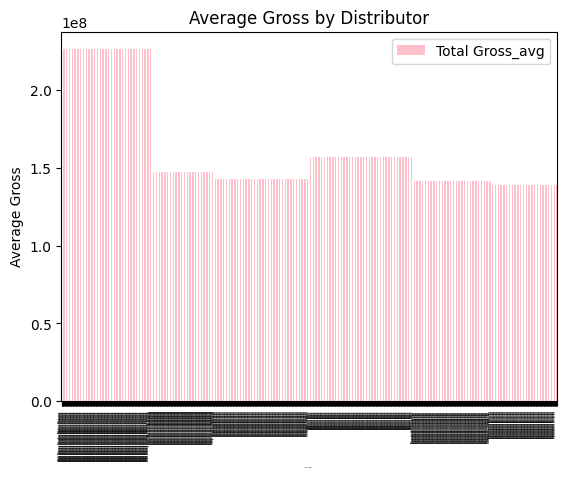

In [42]:
##Creating a bar graph with the new column created
plot1 = morethan100.plot(kind = 'bar', x='Distributor', y = 'Total Gross_avg', color = 'pink')
##Labels
plot1.set_xticklabels(morethan100['Distributor'], rotation = 90, ha='right', fontsize=2)
plot1.set_xlabel('Distributors', fontsize=1)
plot1.set_ylabel('Average Gross')
plot1.set_title('Average Gross by Distributor')

In [45]:
##making average gross per year data
movies['Date'] = pd.to_datetime(movies['Date'])
movies['Year'] = movies['Date'].dt.year
avggrossyear = movies.groupby('Year')['Total Gross'].mean()

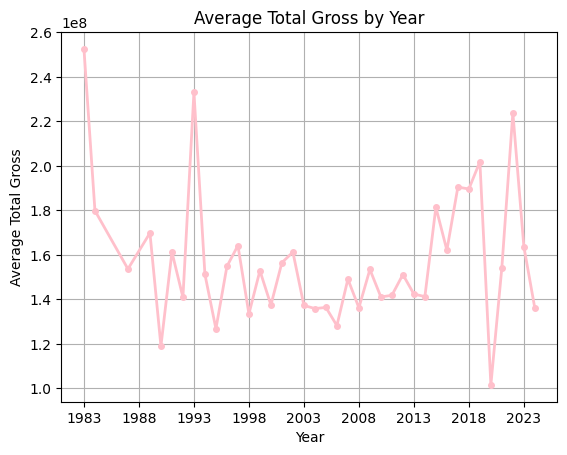

In [49]:
# Making a line graph with the average gross per year
avggrossyear.plot(kind='line', marker='o', color='pink', linewidth=2, markersize=4)
#Labels and titles
plt.xlabel('Year')
plt.ylabel('Average Total Gross')
plt.title('Average Total Gross by Year')
###Changing the scale to 5 years instead of default 10
plt.xticks(range(min(avggrossyear.index), max(avggrossyear.index)+1, 5))
# Show the plot
plt.grid(True)  # Add grid lines


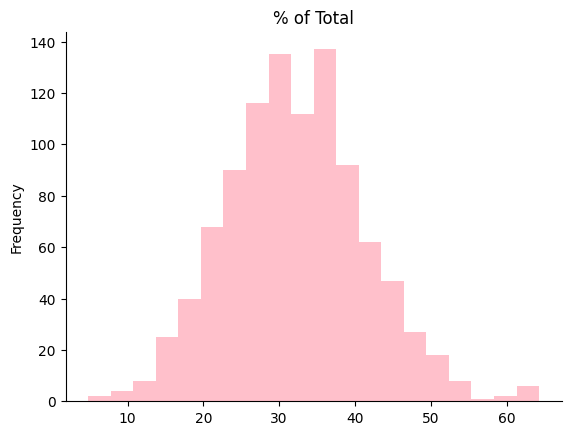

In [53]:
movies['% of Total'].plot(kind='hist', bins=20, title='% of Total', color='pink')
plt.gca().spines[['top', 'right',]].set_visible(False)